In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

https://github.com/stephenccodes/eds220-hwk2.git

- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

In [3]:
# FINAL CODE
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:

# Read in salmon catch data
catch_data = pd.read_csv("c:/Users/steph/Downloads/salmon_data.csv")

catch_data = catch_data.drop(columns = ['notesRegCode'])
catch_data.at[400, 'Catch'] = '1'

catch_data['Catch'] = catch_data['Catch'].astype('int64')

avg_region = (catch_data.groupby('Region')
                        ['Catch']
                        .mean()
                        )
                        


## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [65]:
# Load packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in salmon catch data
catch_data = pd.read_csv("c:/Users/steph/Downloads/salmon_data.csv")

catch_data.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [66]:
# Print the column names and the class of each column
print(catch_data.dtypes)

# Print the dimensions of the dataset
print(catch_data.shape)

# Find the unique values of the `Region` and `Year` columns
print(catch_data['Region'].unique())

print(catch_data['Year'].unique())

# Find the sum of all NA values in each column and print the results
na_counts = catch_data.isna().sum()
print(na_counts)

Region          object
Year             int64
notesRegCode    object
Species         object
Catch           object
dtype: object
(8540, 5)
['SSE' 'NSE' 'YAK' 'GSE' 'BER' 'COP' 'PWS' 'CKI' 'BRB' 'KSK' 'YUK' 'NRS'
 'KTZ' 'KOD' 'CHG' 'SOP' 'ALU' 'NOP']
[1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899
 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1883 1884 1885 1878 1879 1880 1881 1882]
Region             0
Year               0
notesRegCode    7125
Species            0
Catch              0
dtype: int64


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

In the previous step, I chose to look at the names of all the columns and their respective data types so that I could accurately call and manipulate them them later in the activity. IN some cases, functinos won't apply to data of a given class so I will need to know the type of data when I attempt to clean or transform it. I also checked the unique values of the region and year columns to get an idea of the responses that were observed, what to expect, and to see if any years were omitted. Lastly, I checked each column for a sum of all NA values present to ensure that I wasn't missing any data.    

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [67]:
#Find the unique values of the `notesRegCode` column and assign it to a variable
notes_unique = catch_data['notesRegCode'].unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [68]:
# Remove the `notesRegCode` column and  save it to the same variable name
catch_data = catch_data.drop(columns = ['notesRegCode'])

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


It looks like the 'Chinook' column is currently classified as object, but the data is numerical. It needs to be changed.

In [69]:
# Find the data types of each column again
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [70]:
# Try to reassign the class of the 'Catch' column
# catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. 

In [71]:
# Use `.loc` to identify any rows of data where 'Catch' has letter 'I' instead of number '1'
print(catch_data.loc[catch_data['Catch'] == 'I'])

#Assign this whole row to a variable
catch_I = catch_data.loc[catch_data['Catch'] == 'I', ['Region', 'Year', 'Species', 'Catch']]

print(catch_I) 

    Region  Year  Species Catch
400    GSE  1955  Chinook     I
    Region  Year  Species Catch
400    GSE  1955  Chinook     I


## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

In [72]:
# Use `.loc' to update the 'I' to '1'
catch_data.loc[400, 'Catch'] = '1'

# Assign this changed row to a variable
catch_1 = catch_data.loc[[400]] 
catch_1

,Region,Year,Species,Catch
400,GSE,1955,Chinook,1


## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [74]:
# Change the 'Catch' column to a numeric class
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Assign the `.dtypes` out put as a variable
catch_column_type = catch_data.dtypes
catch_column_type

Region     object
Year        int64
Species    object
Catch       int64
dtype: object

In [64]:
catch_data.dtypes

dtype('int64')

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [24]:
# Use `groupy` to select 'Region' and find th mean of the 'Catch' column
# Assign the resulting dataframe to a variable
avg_region = catch_data.groupby('Region')['Catch'].mean().reset_index()
avg_region

,Region,Catch
0,ALU,40.383908
1,BER,16.372549
2,BRB,2709.796491
3,CHG,315.487273
4,CKI,683.571429
5,COP,179.223404
6,GSE,133.841463
7,KOD,1528.350000
8,KSK,67.642353
9,KTZ,18.836145


,Catch
Region,
ALU,40.383908
BER,16.372549
BRB,2709.796491
CHG,315.487273
CKI,683.571429
COP,179.223404
GSE,133.841463
KOD,1528.350000
KSK,67.642353


<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

In [ ]:
# Confirm the original data range is the same as the expected range for the plot
print(catch_data['Year'].min())

print(catch_data['Year'].max())

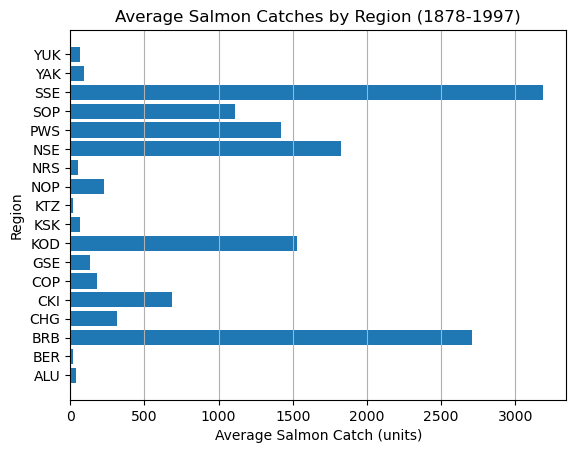

In [26]:
plt.figure()
plt.barh(avg_region['Region'], avg_region['Catch'])
plt.title('Average Salmon Catches by Region (1878-1997)')
plt.ylabel('Region')
plt.xlabel('Average Salmon Catch (units)')
plt.grid(axis='x')
plt.show()


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).